In [1]:
import pandas as pd
import numpy as np

In [2]:
#reading the csv file
df=pd.read_csv("C:\\Users\\USER\\Desktop\\Competition\\train_data.csv")
df = df[df.columns[4:9]]
df.head()


,stream.1,stream.2,stream.3,stream.4,stream.5
0,0.0,0.172275,1.391847,0.332011,0.0
1,0.0,0.317042,0.403132,0.485143,0.0
2,0.0,0.533848,1.499822,0.217974,0.0
3,0.0,0.753272,1.369228,0.211693,0.0
4,0.0,0.590760,0.813470,0.233559,0.0


In [3]:
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout,LSTM
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler


Using TensorFlow backend.


In [4]:
def model():
    # Initialising the RNN
    model = Sequential()

    # Adding the LSTM layer
    model.add(LSTM(units = 100, return_sequences = True, input_shape = (168,1)))
    model.add(Dropout(0.2))

    # Adding another LSTM layer
    model.add(LSTM(units = 50, return_sequences = False))
    model.add(Dropout(0.2))

    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    #es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    #mc=ModelCheckpoint('C:\\Users\\USER\\Desktop\\Competition\\best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    #callbacks=[es,mc]
    
    
    return model

In [5]:
def get_training_dataset(dataset):

    #creating the training datasets and labels
    X_train=np.zeros([6048,168],dtype=float)
    y_train=np.zeros(6048,dtype=float)
    for i in range(0,6048):
        for j in range(0,168):
            X_train[i,j]=stream_1[i+j]
        y_train[i]=stream_1[i+j+1]
    X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
    y_train=y_train.reshape(-1,1)
    
    assert(X_train.shape[0]==y_train.shape[0]),"Dimention is not matched"
    
    return (X_train,y_train)

In [6]:
results=np.zeros([5,30])
actual_results=np.zeros([5,30])
for i in range(0,5):
    true_dataset=df.iloc[:,i].values
    dataset=true_dataset.copy()
    actual_results[i,:]=true_dataset[6216:6246]
    
    #using minmax scaling
    dataset=dataset.reshape(-1,1)
    sc=MinMaxScaler(feature_range=(0,1))
    dataset=sc.fit_transform(dataset)
    stream_1=dataset[:6216]
    
    X_train,y_train=get_training_dataset(dataset)
    
    regressor=model()
    
    regressor.fit(x=X_train,y=y_train,verbose=1,epochs=20,batch_size=64)
    
    
    #using the forecasted result of timestep 't' as the input to forecast at timestep 't+1'
    X_list=[]
    for j in range(0,168):
        X_list.append(dataset[6048+j])
    for k in range(0,30):
        X_test=np.array(X_list).reshape(1,168,1)
        predicted_demand=regressor.predict(X_test)
        true_predicted_demand = sc.inverse_transform(predicted_demand).reshape(1)
        results[i,k]=true_predicted_demand
        X_list.append(predicted_demand[0,0])
        del X_list[0]


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
6048/6048 [==============================] - 17s 3ms/step - loss: 0.0107
Epoch 2/20
6048/6048 [==============================] - 16s 3ms/step - loss: 0.0078
Epoch 3/20
6048/6048 [==============================] - 16s 3ms/step - loss: 0.0068
Epoch 4/20
6048/6048 [==============================] - 16s 3ms/step - loss: 0.0064
Epoch 5/20
6048/6048 [==============================] - 17s 3ms/step - loss: 0.0058
Epoch 6/20
6048/6048 [==============================] - 17s 3ms/step - loss: 0.0056
Epoch 7/20
6048/6048 [==============================] - 17s 3ms/step - loss: 0.0055
Epoch 8/20
6048/6048 [==============================] - 17s 3ms/step - loss: 0.0055
Epoch 9/20
6048/6048 [==============================] - 17s 3ms/step - loss: 0.0054
Epoch 10/

6048/6048 [==============================] - 23s 4ms/step - loss: 0.0071
Epoch 7/20
6048/6048 [==============================] - 23s 4ms/step - loss: 0.0070
Epoch 8/20
6048/6048 [==============================] - 25s 4ms/step - loss: 0.0068
Epoch 9/20
6048/6048 [==============================] - 25s 4ms/step - loss: 0.0067
Epoch 10/20
6048/6048 [==============================] - 26s 4ms/step - loss: 0.0065
Epoch 11/20
6048/6048 [==============================] - 25s 4ms/step - loss: 0.0064
Epoch 12/20
6048/6048 [==============================] - 24s 4ms/step - loss: 0.0063
Epoch 13/20
6048/6048 [==============================] - 20s 3ms/step - loss: 0.0061
Epoch 14/20
6048/6048 [==============================] - 20s 3ms/step - loss: 0.0061
Epoch 15/20
6048/6048 [==============================] - 19s 3ms/step - loss: 0.0060
Epoch 16/20
6048/6048 [==============================] - 20s 3ms/step - loss: 0.0059
Epoch 17/20
6048/6048 [==============================] - 19s 3ms/step - loss: 0.

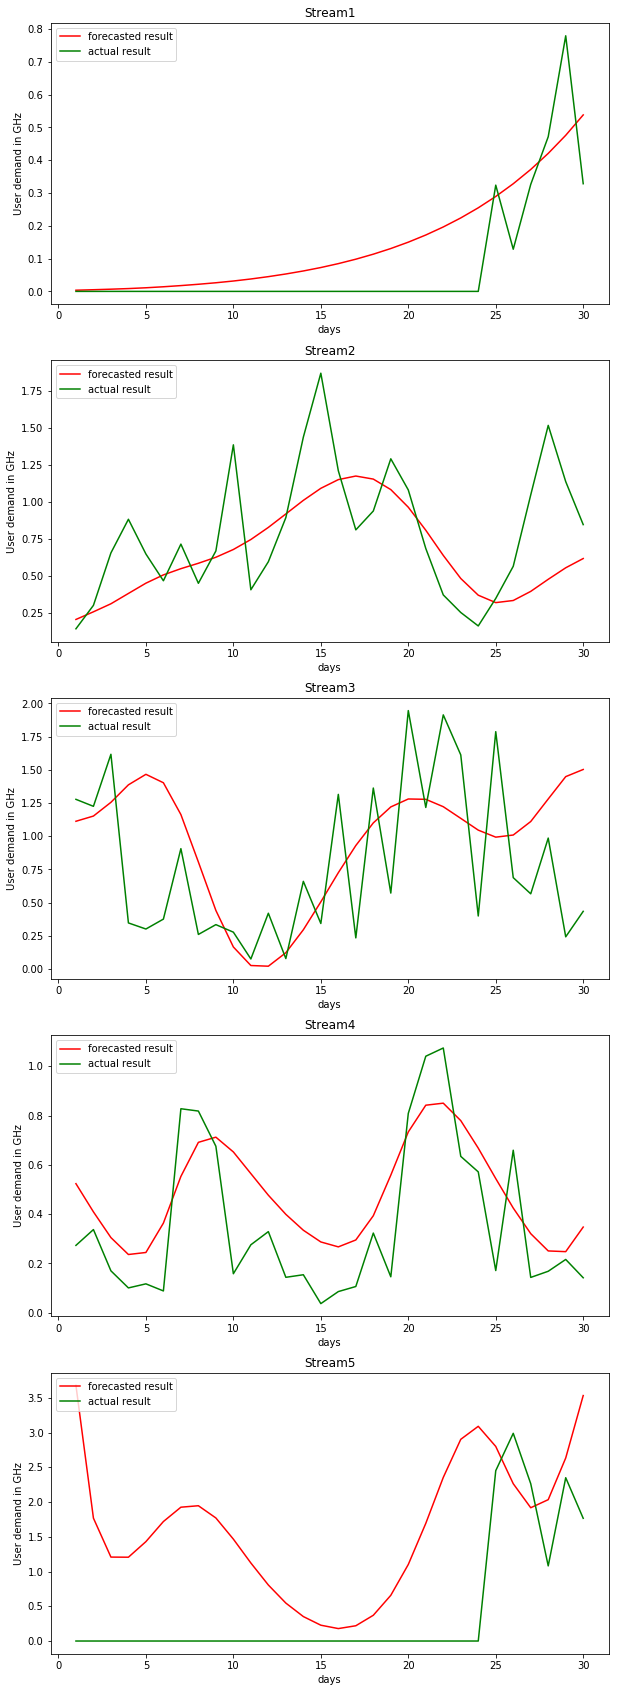

In [7]:
#Comparing the forecasted result with original values
fig, axs = plt.subplots(5,figsize=(10,30))
x=np.linspace(1,30,30)
for i in range(0,5):
    axs[i].plot(x,results[i,:],color='r',label="forecasted result")
    axs[i].plot(x,actual_results[i,:],color='g',label="actual result")
    axs[i].legend(loc="upper left")
    axs[i].set_xlabel("days")
    axs[i].set_ylabel("User demand in GHz")
    axs[i].set_title("Stream"+str(i+1))
plt.show()